In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
data = pd.read_csv("C:/Users/ncmia/OneDrive/Desktop/Depression_Student_Dataset_Unclean.csv")
data.head()

,ID,Gender,Age,Academic Pressure,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,Male,28.0,2.0,7-8 hours,Moderate,Yes,9.0,2.0,Yes,No
1,2,Male,28.0,NaN,5-6 hours,Healthy,Yes,7.0,NaN,Yes,No
2,3,Male,25.0,1.0,5-6 hours,Unhealthy,Yes,10.0,4.0,No,Yes
3,4,Male,23.0,1.0,More than 8 hours,Unhealthy,Yes,7.0,2.0,Yes,No
4,5,Female,31.0,1.0,More than 8 hours,Healthy,Yes,4.0,2.0,Yes,No


In [4]:
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     502 non-null    int64  
 1   Gender                                 502 non-null    object 
 2   Age                                    452 non-null    float64
 3   Academic Pressure                      446 non-null    float64
 4   Sleep Duration                         487 non-null    object 
 5   Dietary Habits                         492 non-null    object 
 6   Have you ever had suicidal thoughts ?  494 non-null    object 
 7   Study Hours                            450 non-null    float64
 8   Financial Stress                       450 non-null    float64
 9   Family History of Mental Illness       489 non-null    object 
 10  Depression                             502 non-null    obje

In [5]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ID                                        0
Gender                                    0
Age                                      50
Academic Pressure                        56
Sleep Duration                           15
Dietary Habits                           10
Have you ever had suicidal thoughts ?     8
Study Hours                              52
Financial Stress                         52
Family History of Mental Illness         13
Depression                                0
dtype: int64


In [6]:
numerical_columns = ['Age', 'Academic Pressure', 'Study Hours', 'Financial Stress']

mean_values = data[numerical_columns].median()

data[numerical_columns] = data[numerical_columns].fillna(mean_values)
print(data.isnull().sum())

ID                                        0
Gender                                    0
Age                                       0
Academic Pressure                         0
Sleep Duration                           15
Dietary Habits                           10
Have you ever had suicidal thoughts ?     8
Study Hours                               0
Financial Stress                          0
Family History of Mental Illness         13
Depression                                0
dtype: int64


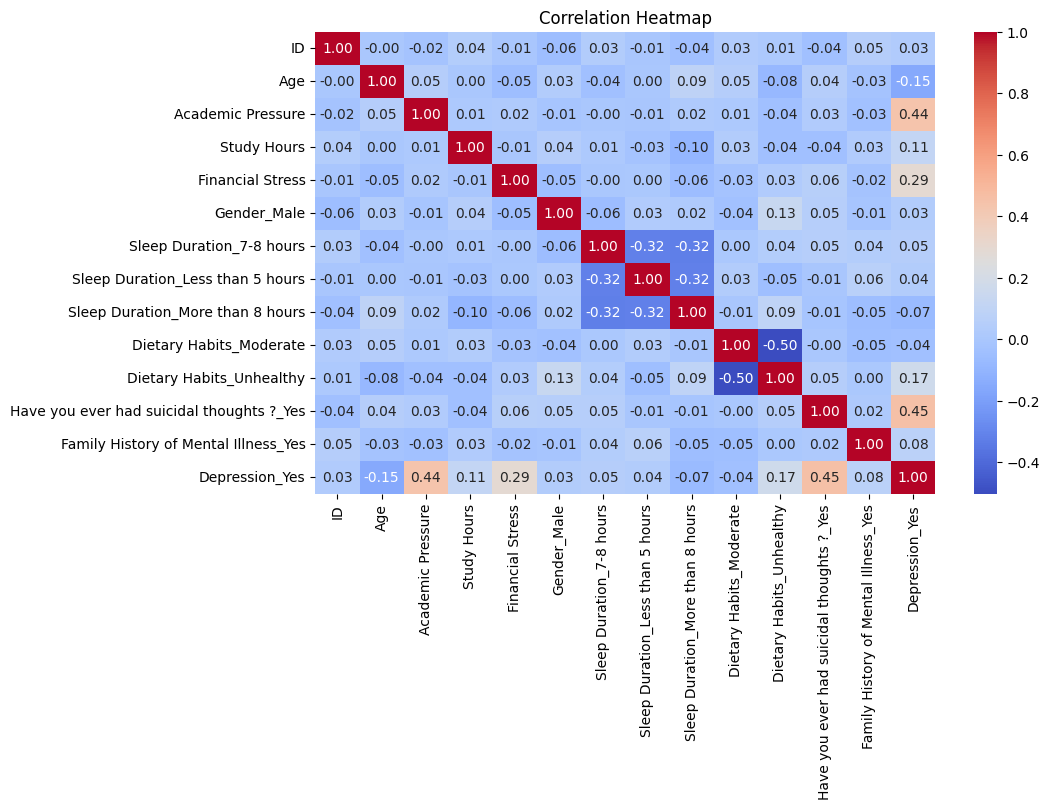

In [7]:
data = pd.get_dummies(data, drop_first=True)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [8]:
X = data.drop(columns=['Study Hours']) 
y = data['Study Hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Classifier (Gini Index)

In [9]:
dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Predictions and Accuracy

In [10]:
y_pred_gini = dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Decision Tree (Gini) Accuracy: {accuracy_gini:.2f}")

Decision Tree (Gini) Accuracy: 0.05


Decision Tree Classifier (Entropy)

In [11]:
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Predictions and Accuracy

In [12]:
y_pred_entropy = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Decision Tree (Entropy) Accuracy: {accuracy_entropy:.2f}")

Decision Tree (Entropy) Accuracy: 0.07


Precision, Recall, F1-Score

In [13]:
precision_gini = precision_score(y_test, y_pred_gini, average="weighted")
recall_gini = recall_score(y_test, y_pred_gini, average="weighted")
f1_gini = f1_score(y_test, y_pred_gini, average="weighted")

C:\Users\ncmia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ncmia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
precision_entropy = precision_score(y_test, y_pred_entropy, average="weighted")
recall_entropy = recall_score(y_test, y_pred_entropy, average="weighted")
f1_entropy = f1_score(y_test, y_pred_entropy, average="weighted")

C:\Users\ncmia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ncmia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
print("\nPrecision, Recall, F1-Score (Gini):")
print(f"Precision: {precision_gini:.2f}, Recall: {recall_gini:.2f}, F1-Score: {f1_gini:.2f}")
print("\nPrecision, Recall, F1-Score (Entropy):")
print(f"Precision: {precision_entropy:.2f}, Recall: {recall_entropy:.2f}, F1-Score: {f1_entropy:.2f}")



Precision, Recall, F1-Score (Gini):
Precision: 0.04, Recall: 0.05, F1-Score: 0.04

Precision, Recall, F1-Score (Entropy):
Precision: 0.08, Recall: 0.07, F1-Score: 0.07


Confusion Matrix

In [16]:
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)

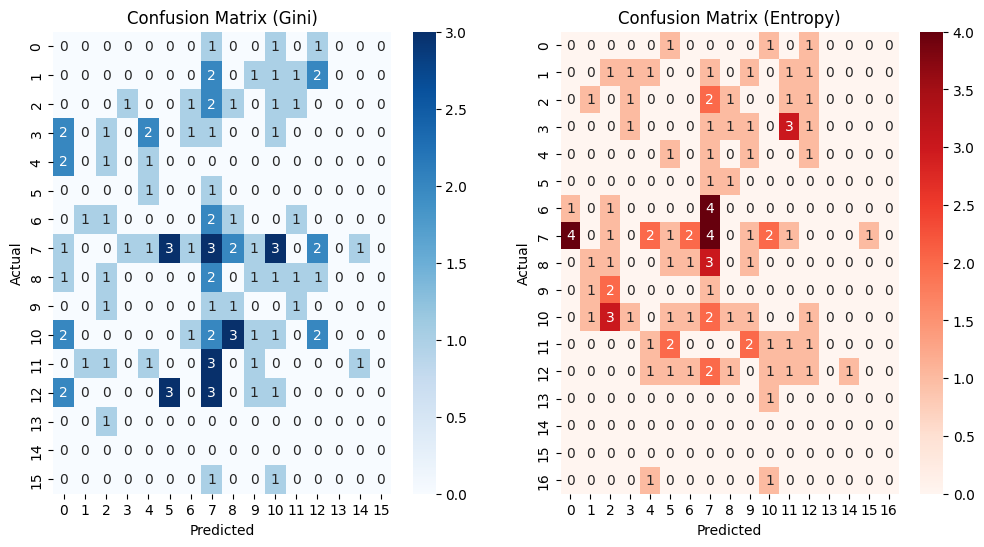

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_gini, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix (Gini)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_entropy, annot=True, cmap="Reds", fmt="d")
plt.title("Confusion Matrix (Entropy)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ROC Curve

In [18]:
y_probs_gini = dt_gini.predict_proba(X_test)
y_probs_entropy = dt_entropy.predict_proba(X_test)

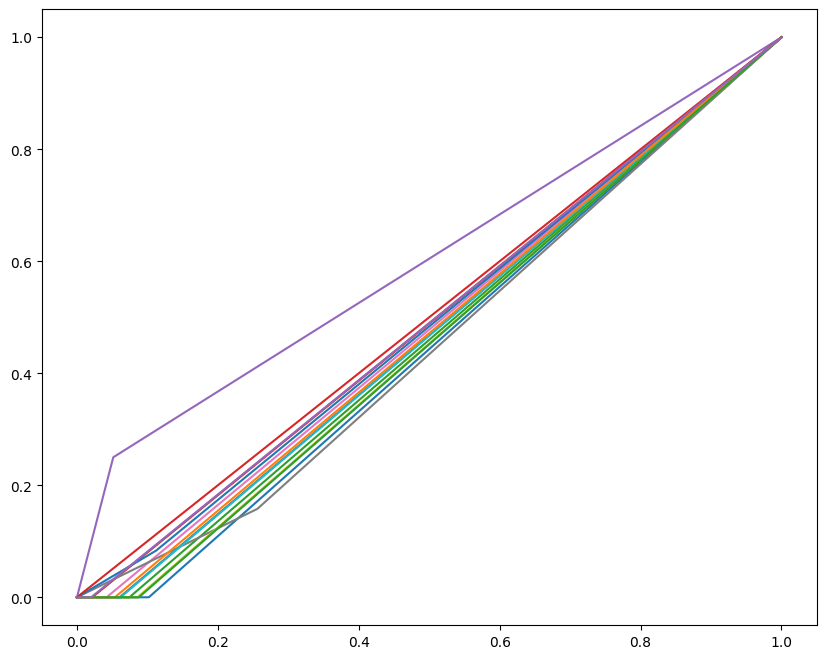

In [19]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

classes = sorted(y_test.unique())  # Ensure classes are sorted
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(10, 8))

# Loop through each class and calculate ROC
for i, class_label in enumerate(classes):
    # ROC for Gini
    fpr_gini, tpr_gini, _ = roc_curve(y_test_bin[:, i], y_probs_gini[:, i])
    roc_auc_gini = auc(fpr_gini, tpr_gini)
    plt.plot(fpr_gini, tpr_gini, label=f'Gini - Class {class_label} (AUC = {roc_auc_gini:.2f})')
    
   

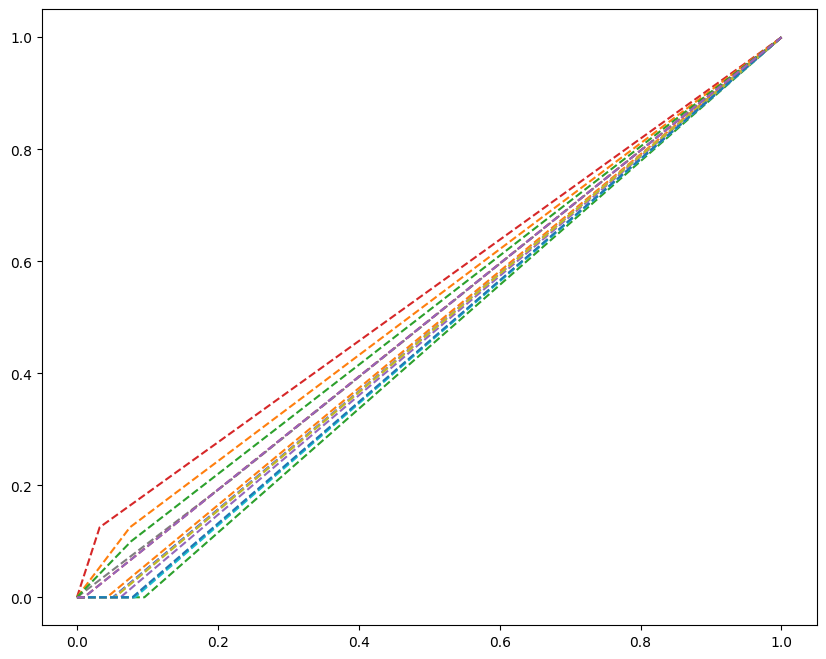

In [20]:
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
 # ROC for Entropy
    fpr_entropy, tpr_entropy, _ = roc_curve(y_test_bin[:, i], y_probs_entropy[:, i])
    roc_auc_entropy = auc(fpr_entropy, tpr_entropy)
    plt.plot(fpr_entropy, tpr_entropy, linestyle='--', label=f'Entropy - Class {class_label} (AUC = {roc_auc_entropy:.2f})')

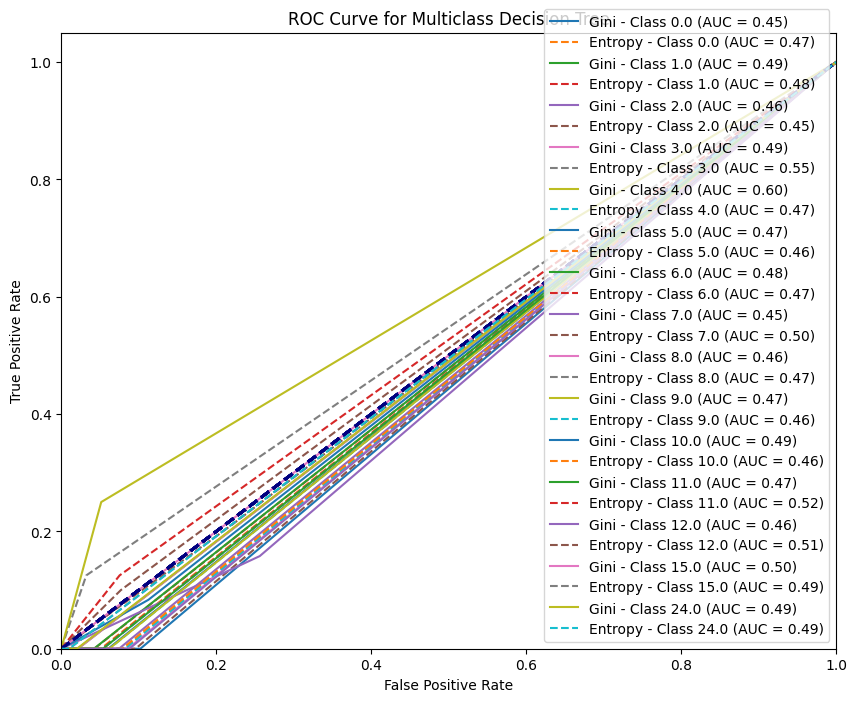

In [21]:

plt.figure(figsize=(10, 8))

# Loop through each class and calculate ROC
for i, class_label in enumerate(classes):
    # ROC for Gini
    fpr_gini, tpr_gini, _ = roc_curve(y_test_bin[:, i], y_probs_gini[:, i])
    roc_auc_gini = auc(fpr_gini, tpr_gini)
    plt.plot(fpr_gini, tpr_gini, label=f'Gini - Class {class_label} (AUC = {roc_auc_gini:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    fpr_entropy, tpr_entropy, _ = roc_curve(y_test_bin[:, i], y_probs_entropy[:, i])
    roc_auc_entropy = auc(fpr_entropy, tpr_entropy)
    plt.plot(fpr_entropy, tpr_entropy, linestyle='--', label=f'Entropy - Class {class_label} (AUC = {roc_auc_entropy:.2f})')
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Decision Tree')
plt.legend(loc="lower right")
plt.show()

Visualize Decision Tree

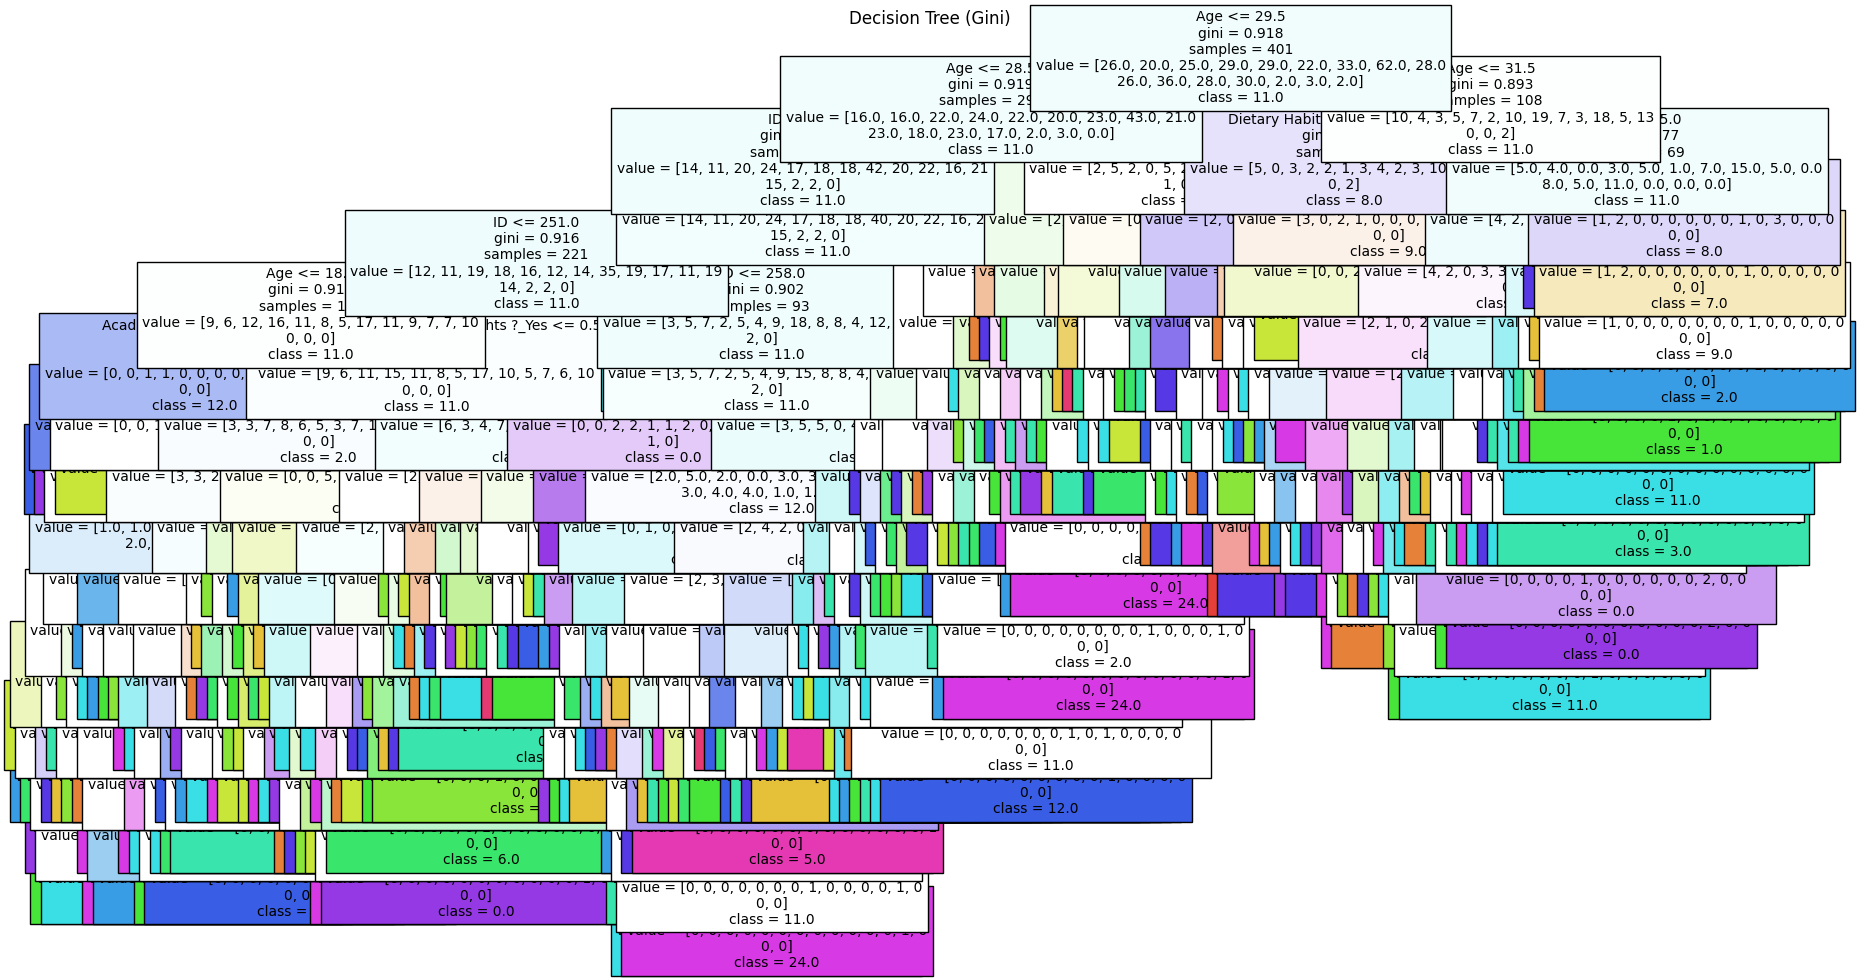

In [22]:
plt.figure(figsize=(20, 12))
plot_tree(dt_gini, feature_names=X.columns, class_names=y.unique().astype(str), filled=True, fontsize=10)
plt.title("Decision Tree (Gini)")
plt.show()



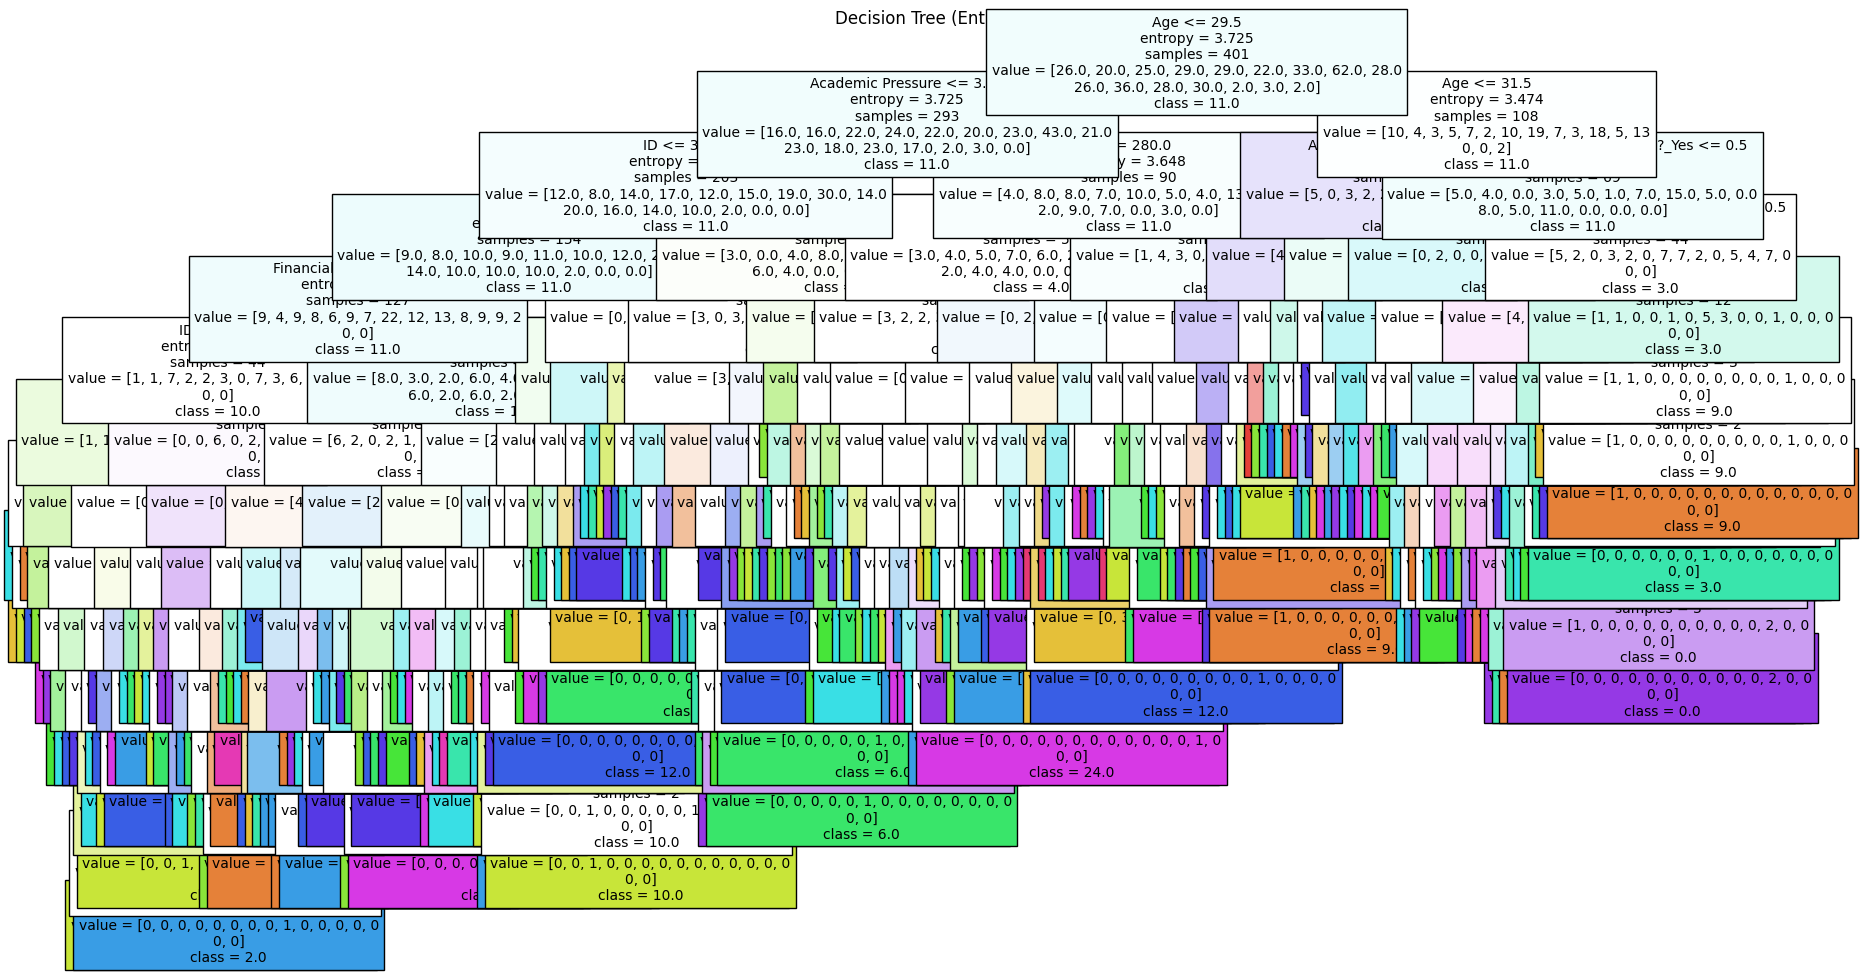

In [23]:
plt.figure(figsize=(20, 12))
plot_tree(dt_entropy, feature_names=X.columns, class_names=y.unique().astype(str), filled=True, fontsize=10)
plt.title("Decision Tree (Entropy)")
plt.show()

Results and Conclusion

In [24]:
print("\nResults and Conclusion:")
print(f"Accuracy (Gini): {accuracy_gini:.2f}, Precision: {precision_gini:.2f}, Recall: {recall_gini:.2f}, F1-Score: {f1_gini:.2f}")
print(f"Accuracy (Entropy): {accuracy_entropy:.2f}, Precision: {precision_entropy:.2f}, Recall: {recall_entropy:.2f}, F1-Score: {f1_entropy:.2f}")
print("\nGini performs better than Entropy based on accuracy and F1-Score." if accuracy_gini > accuracy_entropy else "Entropy performs better than Gini.")



Results and Conclusion:
Accuracy (Gini): 0.05, Precision: 0.04, Recall: 0.05, F1-Score: 0.04
Accuracy (Entropy): 0.07, Precision: 0.08, Recall: 0.07, F1-Score: 0.07
Entropy performs better than Gini.


In [25]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train, y_train)

C:\Users\ncmia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [26]:
# Pre-pruning: Setting max_depth, min_samples_split, and min_samples_leaf
dt_prepruned = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_prepruned.fit(X_train, y_train)

# Evaluate the pre-pruned tree
y_pred_prepruned = dt_prepruned.predict(X_test)
accuracy_prepruned = accuracy_score(y_test, y_pred_prepruned)

print("Pre-Pruning Accuracy:", accuracy_prepruned)
print("\nClassification Report (Pre-Pruned Tree):\n", classification_report(y_test, y_pred_prepruned))

Pre-Pruning Accuracy: 0.1188118811881188

Classification Report (Pre-Pruned Tree):
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00         7
         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         6
         7.0       0.16      0.53      0.25        19
         8.0       0.00      0.00      0.00         8
         9.0       0.00      0.00      0.00         4
        10.0       0.29      0.17      0.21        12
        11.0       0.00      0.00      0.00         8
        12.0       0.00      0.00      0.00        10
        15.0       0.00      0.00      0.00         1
        24.0       0.00      0.00      0.00         2

    accuracy                           0.12       

C:\Users\ncmia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ncmia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ncmia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

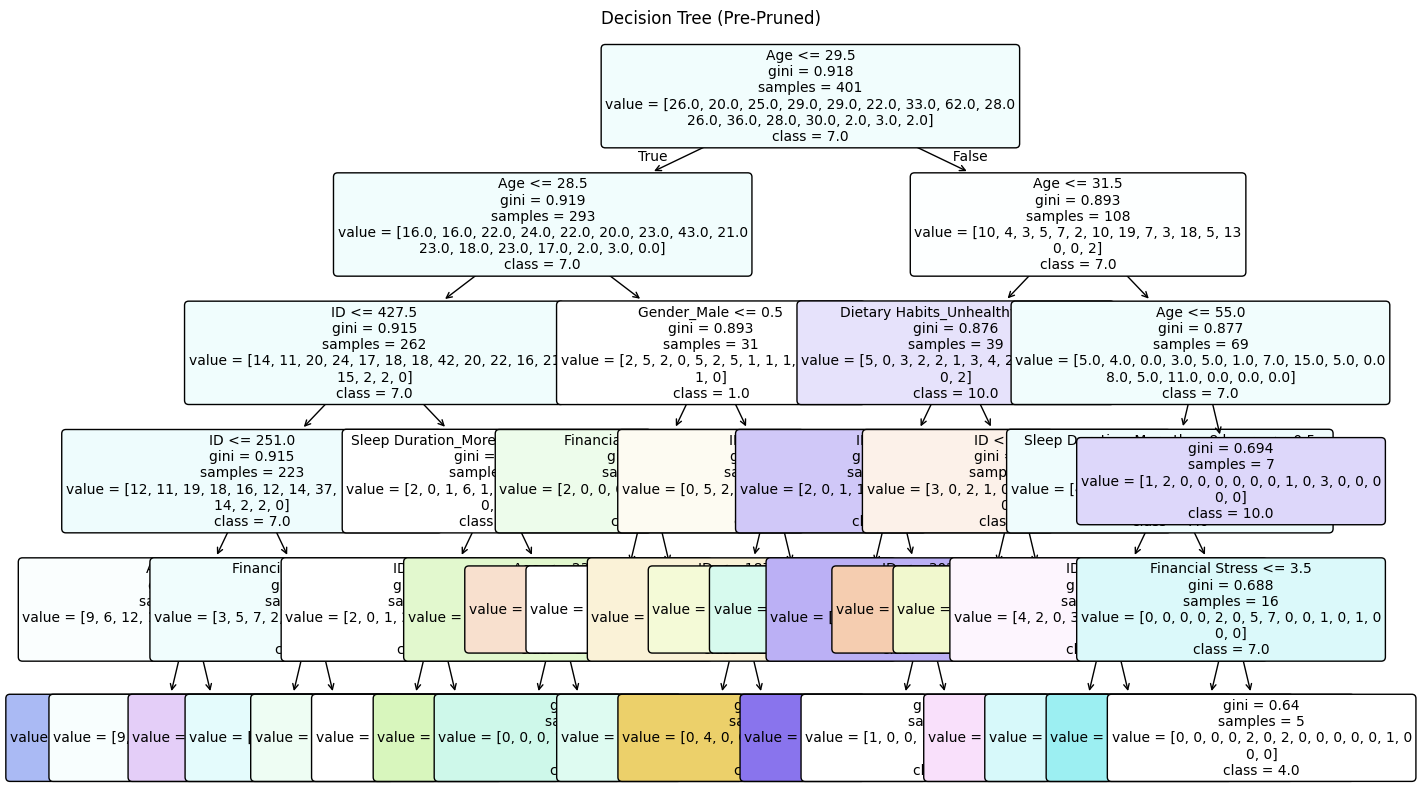

In [27]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    dt_prepruned, 
    fontsize=10,
    filled=True, 
    rounded=True, 
    feature_names=X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X.shape[1])], 
    class_names=[str(cls) for cls in dt_prepruned.classes_]
)
plt.title("Decision Tree (Pre-Pruned)")
plt.show()

In [28]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00166251 0.00166251 0.00166251 0.00199501 0.00199501
 0.00199501 0.00199501 0.00207814 0.00207814 0.00218204 0.00249377
 0.00249377 0.00249377 0.00249377 0.00249377 0.00249377 0.00249377
 0.00249377 0.00249377 0.00249377 0.00249377 0.00249377 0.00249377
 0.00249377 0.00249377 0.00249377 0.00249377 0.00249377 0.00249377
 0.00249377 0.00249377 0.00249377 0.00249377 0.00249377 0.00249377
 0.00249377 0.00249377 0.00249377 0.00249377 0.00249377 0.00249377
 0.00249377 0.00249377 0.00249377 0.00249377 0.00249377 0.00249377
 0.00249377 0.00249377 0.00249377 0.00249377 0.00249377 0.00249377
 0.00249377 0.00249377 0.00261252 0.00263627 0.00270158 0.00274314
 0.00281043 0.00285002 0.00285002 0.00290939 0.00299252 0.00299252
 0.00301195 0.00306377 0.00315877 0.00315877 0.0032419  0.0032419
 0.0032419  0.0032419  0.00328184 0.00332502 0.00332502 0.00332502
 0.00332502 0.00332502 0.00332502 0.00332502 0.00332502 0.00332502
 0.00332502 0.00332502 0.00332502 0.00332502 0.00332502 0.00332

In [29]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

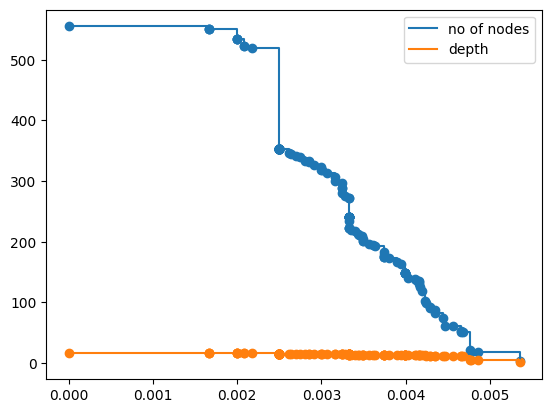

In [30]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

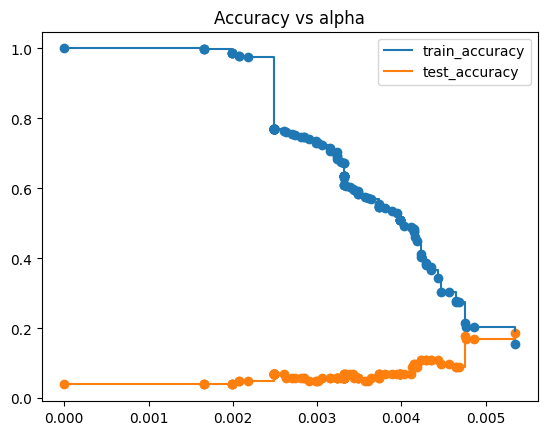

In [31]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.1546134663341646
Test score 0.18811881188118812
Train Confusion matrix


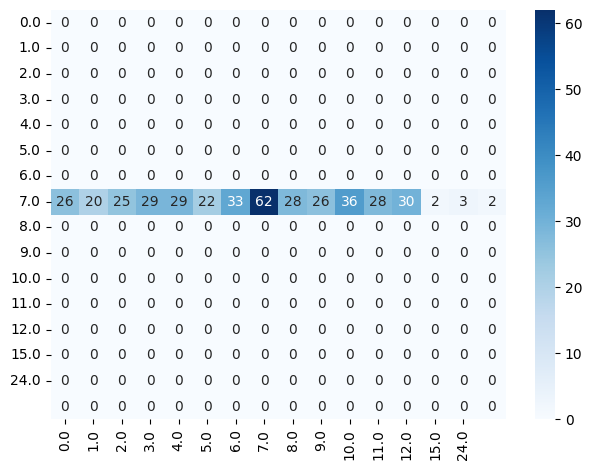

Test Confusion matrix


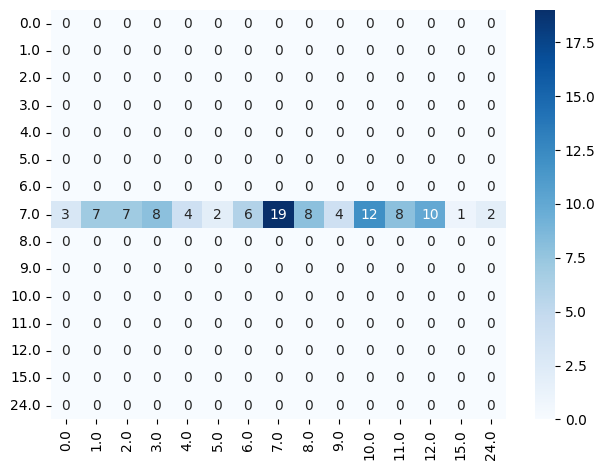

In [ ]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
    
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')


In [34]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf_,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (Post-Pruned)")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'feature_names'

<Figure size 2000x1000 with 0 Axes>